<a href="https://colab.research.google.com/github/Maria-arroyo18/Integracion-de-datos2025/blob/main/1_Caracterizaci%C3%B3n_VA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caracterización Experimental de Variables**

0. Cargar las líbrerias de trabajo

In [1]:
import numpy as np #Funciones Númericas
import matplotlib.pyplot as plt
import pandas as pd #Comunicación Excel
import seaborn as sns #Líbreria para la gráfica de distribuciones

#Para carga automática de los datos
from google.colab import drive #Cargar datos desde drive automáticamente
drive.mount('/content/drive')  #Conecta el drive al colab

Mounted at /content/drive


1. Se procede con la carga de los datos

In [2]:
nxl = "/content/drive/MyDrive/Integración/3. FallasTecnologicas (1).xlsx"
XDB= pd.read_excel(nxl, sheet_name=0)
XDB.head(10) #Mostrar los primeros 10 datos

,Fechas,Eventos,Transaccion Promedio,Eventos-Fallo,Pérdida Promedio
0,Semana 1,80,14.8058,1,0.5374
1,Semana 2,105,56.4721,4,1.1978
2,Semana 3,70,9.9760,5,0.4269
3,Semana 4,105,18.2949,6,1.0814
4,Semana 5,130,23.4112,7,1.2105
5,Semana 6,100,31.5177,3,0.2363
6,Semana 7,115,29.5603,1,0.2737
7,Semana 8,90,36.4063,8,12.4245
8,Semana 9,105,9.3552,1,2.3869
9,Semana 10,85,23.7019,7,0.3098


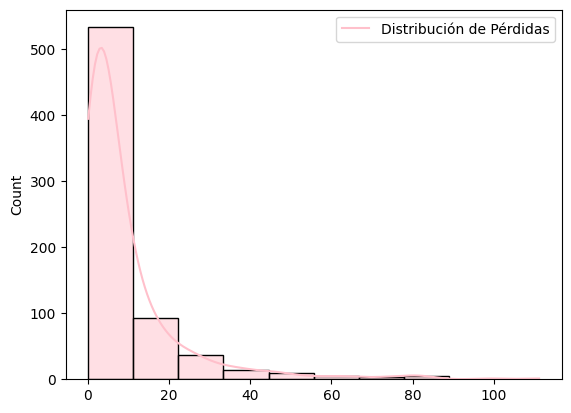

In [3]:
#Tomamos las variables de interés
Xev=XDB.iloc[:,3] #Variable eventos semanales
Xsev=XDB.iloc[:,4] #Pérdidas promedio por evento
LDA=np.multiply(Xev,Xsev) #Multiplicamos las variables

#Gráficamos La Distribución de las Pérdidas
plt.figure()
sns.histplot(LDA,kde=True,bins=10, color="pink")
#bins: Agrupar los datos
plt.legend(["Distribución de Pérdidas"])
plt.show()

2. Caracterización de la Distribución de las Pérdidas

In [4]:
counts,bin_edges=np.histogram(LDA,bins=10)
print ("Intervalos") #Cuantos datos hay por intervalo
print(bin_edges) #Limites de los Intervalos

#Los valores centrales - marcas de clase
mc=(bin_edges[:-1]+bin_edges[1:])/2
print("Los valores centrales de la clase son:\n", mc)

#Cuantos datos hay por intervalo
fp=counts/sum(counts)
print("Los datos por intervalos son:\n", fp)

Intervalos
[  0.1423   11.23637  22.33044  33.42451  44.51858  55.61265  66.70672
  77.80079  88.89486  99.98893 111.083  ]
Los valores centrales de la clase son:
 [  5.689335  16.783405  27.877475  38.971545  50.065615  61.159685
  72.253755  83.347825  94.441895 105.535965]
Los datos por intervalos son:
 [0.76034237 0.13266762 0.05278174 0.01997147 0.0128388  0.00713267
 0.0042796  0.00713267 0.00142653 0.00142653]


In [5]:
#2. Se procede con el calculo de las medidas de tendencia central
#Media, Varianza, Coeficiente de Asimetría, Kurtosis.
u=np.sum(np.multiply(mc,fp))
print("La media de los datos es:",u)

La media de los datos es: 11.07019634094151


In [6]:
#3. Desviación - Estándar (Varianza)
var=np.sum(np.multiply((mc-u)**2,fp)) #Suma producto del Excel
print("La varianza de los datos es:",var)
std=np.sqrt(var)
print("La desviación estándar de los datos es:",std)

La varianza de los datos es: 170.14888945066892
La desviación estándar de los datos es: 13.044113210589247


In [7]:
#4. Coeficiente de asimetría
cas=np.sum(np.multiply(((mc-u)/std)**3,fp))
print("El coeficiente de asimetría de los datos es:",cas)

El coeficiente de asimetría de los datos es: 3.58241551867726


In [11]:
#5. Coeficiente de Kurtosis
ck=np.sum(np.multiply(((mc-u)/std)**4,fp))
ck=ck-3
print("El coeficiente de kurtosis de los datos es:",ck)

El coeficiente de kurtosis de los datos es: 15.266617247076208


**Análisis de Resultados**

En la base de datos se cuenta con un total 701 registros de eventos de pérdida asociados con las operaciones a través de canales electrónicos de una FINITECH. Estos registros nos arrojan como resultado una confiabilidad en la estimación de los estadísticos del 99% de acuerdo con la teoría de los percentiles. En la grafica anterior podemos observar que la distribución presenta estructura de cola larga, esto promovido por un coeficiente de curtosis aproximadamente de 15 unidades, lo que indica que la mayoria de los datos se encuentras muy concentrados alrededor de la media, en un 76% aproximadamente. Esta estructura muestra claramente que los eventos de pérdida extremos son muy escasos, lo que indica una  baja exposición al riesgo.

3. Se procede con el muestreo de la variable aleatoria de pérdidas

In [13]:
from scipy.stats import skew, kurtosis

In [14]:
#0. Preparar la variable para el muestreo
LDAdf =pd.DataFrame(LDA)
#1. se procede con el muestreo - se vs s repetir el numero de los 349
LDAs=LDAdf.sample(n=1000,replace=True)
casd= skew(LDAs)
print("El coeficiente de asimetría de los datos es:",casd)

ckd=kurtosis(LDAs)
ckd=ckd-3
print("El coeficiente de kurtosis de los datos es:",ckd)

El coeficiente de asimetría de los datos es: [2.98413776]
El coeficiente de kurtosis de los datos es: [7.75734781]


In [16]:
pvcas = (cas-casd)/cas
print("Variación del coeficiente de asimetría de los datos es:",pvcas)

pvkd = (ck-ckd)/ck
print("Variación del coeficiente de kurtosis de los datos es:",pvkd)

Variación del coeficiente de asimetría de los datos es: [0.16700401]
Variación del coeficiente de kurtosis de los datos es: [0.49187514]


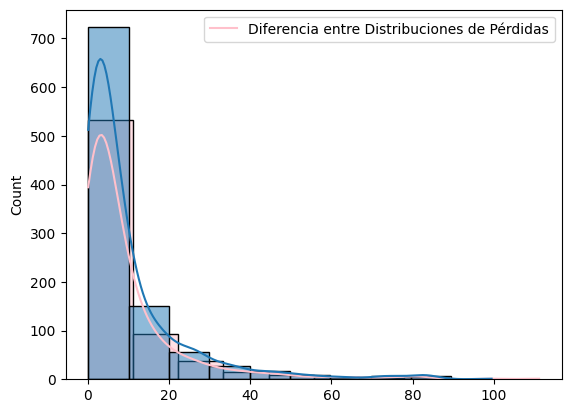

In [21]:
#Se procede con la grafica de la distribución de las pérdidas
plt.figure()
sns.histplot(LDA,kde=True,bins=10, color="pink")
sns.histplot(LDAs,kde=True,bins=10, color="blue")
plt.legend(["Diferencia entre Distribuciones de Pérdidas"])
plt.show()

**4. Mapeo de la distribución de probabilidad**

In [29]:
if abs(cas)<0.5 and abs(ck)<0.5:
  print("Posible distribución Normal")

elif cas>0 and ck>3:
  if ck>=8:
    print("Posible distribución Exponencial")
  elif ck>=6:
    print("Posible distribución Gamma")
  else:
    print("Posible distribución Weibull")
elif cas<0 and ck<3:
  print("Posible distribución Beta")
elif ck<3:
  print("Posible distribución Uniforme")
else:
  print("No se puede determinar la distribución")

Posible distribución Exponencial


**Analisis de Resultados**

El número de datos disponibles para este análisis fueron un total de 701 datos, lo que lo ubica en un confiabilidad del 99%. Para incrementar esta confiabilidad se procedio con un muestreo basado en el método de montecarlo (Giro de la ruleta - cargada) logrando en muchos casos coeficientes de curtosis y coeficientes de asimetría por debajo del 5% y coeficiente de curtosis del 15%, a diferencia del método sampling que utiliza la librería pandas los cuales tuvieron variaciones mayores a estos porcentajes. El método de montecarlo asegura variaciones mucho más bajas en estos coeficientes.